In [1]:
%matplotlib inline  

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

In [190]:
train = pd.read_csv('H:/GIM Strategy and Execution/Knowledge/Data and Python/titanic/train.csv')
test = pd.read_csv('H:/GIM Strategy and Execution/Knowledge/Data and Python/titanic/test.csv')

In [191]:
del(train['Ticket'])

del(train['PassengerId'])

del(test['Ticket'])
del(test['PassengerId'])

In [192]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


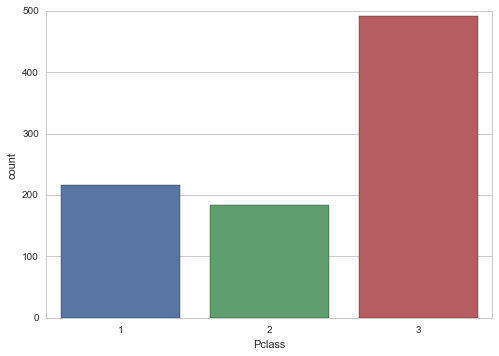

In [193]:
sns.countplot( x= 'Pclass', data = train)

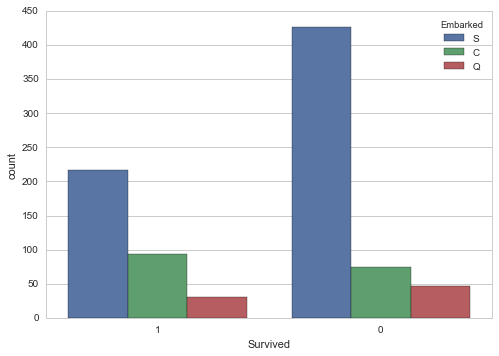

In [194]:
sns.countplot(x = 'Survived', hue = 'Embarked', data = train, order = [1,0])

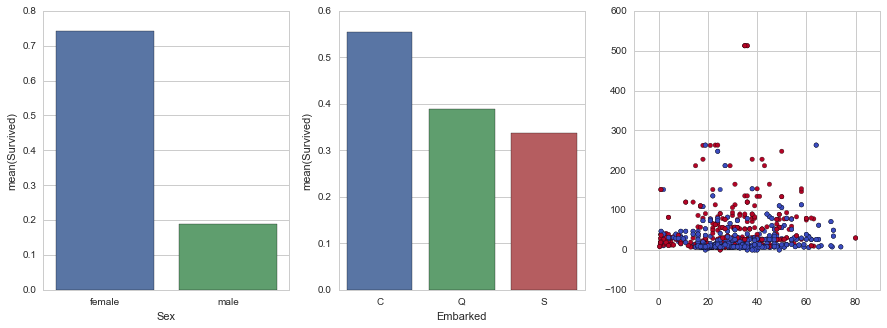

In [195]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

#Plot to see % of people from each embarkment survived
embarkedmean = train[['Survived', 'Embarked']].groupby(['Embarked'], as_index = False).mean()
sns.barplot(x = 'Embarked', y = 'Survived', data = embarkedmean, ax = axis2)

#Plot to see % of male / female survived
sexmean = train[['Survived', 'Sex']].groupby(['Sex'], as_index = False).mean()
sns.barplot('Sex', 'Survived', data = sexmean, ax = axis1)

#plot scatter of age vs fare w/ survival as colors
plt.scatter(train['Age'], train['Fare'], c= train['Survived'], cmap=plt.cm.coolwarm)

tMale = train.loc[train['Sex']=='male']
plt.scatter(tMale['Age'], tMale['Fare'], c= tMale['Survived'], cmap=plt.cm.coolwarm)

In [196]:
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [197]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [198]:
meanSibsp = train[['SibSp', 'Survived']].groupby(['SibSp']).mean()
meanSibsp.columns=['Mean']
countSibSp= train[['SibSp', 'Survived']].groupby(['SibSp']).count()
countSibSp.columns=['Count']
pd.concat([meanSibsp, countSibSp], axis = 1)

,Mean,Count
SibSp,,
0,0.345395,608
1,0.535885,209
2,0.464286,28
3,0.250000,16
4,0.166667,18
5,0.000000,5
8,0.000000,7


In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [200]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']

In [201]:
Y_train.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [202]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [203]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [204]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 62.7+ KB


In [205]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [206]:
PclassEncoder = LabelEncoder()

In [207]:
X_train['Pclass'] = PclassEncoder.fit_transform(X_train['Pclass'])

In [208]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,2,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,2,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,2,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [209]:
PclassEncoder

LabelEncoder()

In [210]:
dict(zip(PclassEncoder.classes_, PclassEncoder.transform(PclassEncoder.classes_)))

{1: 0, 2: 1, 3: 2}

In [211]:
X_train['Pclass'] = PclassEncoder.inverse_transform(X_train['Pclass'])

In [212]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [213]:
X_test.head()

Embarked    4
Parch       0
Pclass      3
Sex         0
SibSp       1
Name: 892, dtype: int64

In [214]:
dFull = pd.concat([X_train,test])

In [215]:
len(X_train)

891

In [216]:
dFull.reset_index(inplace = True)

In [217]:
X_train= dFull.loc[0:891,:]
X_test = dFull.loc[892,:]

In [218]:
X_train.head()

,index,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [219]:
dFull['Title'] = dFull.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [220]:
dFull.head()

,index,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs
2,2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss
3,3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs
4,4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr


In [221]:
dFull.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Don           1
Capt          1
Lady          1
Sir           1
Countess      1
Jonkheer      1
Dona          1
Mme           1
Name: Title, dtype: int64

In [222]:
dFull.Title.replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Mlle', 'Ms', 'Don', 'Capt', 'Lady', 'Sir', 'Countess', 'Jonkheer', 'Dona', 'Mme'], value = 'Other', inplace =True)

In [223]:
dFull.Title.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: Title, dtype: int64

In [224]:
del(dFull['Name'])

In [225]:
dFull['AgeCat'] = 'Adult'
dFull.loc[dFull['Age']<18 , 'AgeCat'] = 'Child'

In [226]:
dFull1 = dFull
del(dFull['Age'])

In [227]:
del[dFull['Cabin']]

In [228]:
dFull.head()

,index,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeCat
0,0,3,male,1,0,7.2500,S,Mr,Adult
1,1,1,female,1,0,71.2833,C,Mrs,Adult
2,2,3,female,0,0,7.9250,S,Miss,Adult
3,3,1,female,1,0,53.1000,S,Mrs,Adult
4,4,3,male,0,0,8.0500,S,Mr,Adult


In [229]:
sexEncode = LabelEncoder()

In [230]:
dFull['Sex'] = sexEncode.fit_transform(dFull['Sex'])

In [231]:
embEncode = LabelEncoder()
titleEncode = LabelEncoder()
AgeCatEncode = LabelEncoder()

In [232]:
dFull['Embarked'] = embEncode.fit_transform(dFull['Embarked'])
dFull['Title'] = titleEncode.fit_transform(dFull['Title'])
dFull['AgeCat'] = AgeCatEncode.fit_transform(dFull['AgeCat'])

In [233]:
dFull.head()

,index,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeCat
0,0,3,1,1,0,7.2500,4,2,0
1,1,1,0,1,0,71.2833,2,3,0
2,2,3,0,0,0,7.9250,4,1,0
3,3,1,0,1,0,53.1000,4,3,0
4,4,3,1,0,0,8.0500,4,2,0


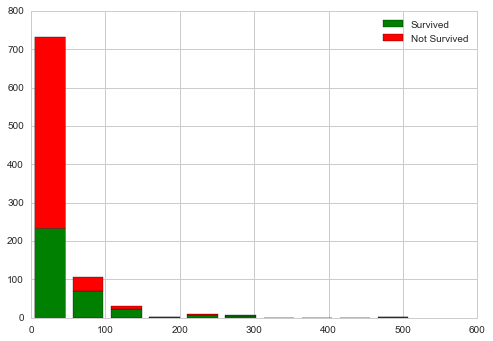

In [234]:
plt.hist([train[train['Survived']==1]['Fare'], train[train['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 10,label = ['Survived','Not Survived'])
plt.legend()

In [235]:
dFull['FareCat'] = 1
dFull.loc[dFull['Fare']<dFull['Fare'].mean(),'FareCat'] =0

In [236]:
del(dFull['Fare'])

In [237]:
ohe = OneHotEncoder()

In [238]:
ohe.fit(dFull)

OneHotEncoder(categorical_features='all', dtype=<type 'float'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [239]:
dLabels = ohe.transform(dFull).toarray()

In [240]:
dFullEnc = pd.DataFrame(dLabels)

In [241]:
dFullEnc.head()

,0,1,2,3,4,5,6,7,8,9,...,915,916,917,918,919,920,921,922,923,924
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [242]:
dFull.head()

,index,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeCat,FareCat
0,0,3,1,1,0,4,2,0,0
1,1,1,0,1,0,2,3,0,1
2,2,3,0,0,0,4,1,0,0
3,3,1,0,1,0,4,3,0,1
4,4,3,1,0,0,4,2,0,0


In [246]:
X_train=dFullEnc.loc[0:890,:]

In [247]:
logreg = LogisticRegression()

In [248]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [249]:
logreg.score(X_train, Y_train)

0.88327721661054992

In [250]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)

1.0

In [252]:
X_train2 = dFull.loc[0:890,:]

In [253]:
logreg.fit(X_train2, Y_train)
logreg.score(X_train2, Y_train)

0.80246913580246915

In [254]:
logreg.coef_[0]

array([  2.70200058e-04,  -7.79385927e-01,  -2.58968075e+00,
        -3.68421991e-01,  -1.41638897e-01,  -8.24879205e-02,
        -9.97673100e-02,   1.21883909e+00,   4.31603019e-01])

In [255]:
coeff_df = pd.DataFrame(X_train2.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)



,Feature,Correlation
7,FareCat,1.218839
0,Pclass,0.000270
5,Title,-0.082488
6,AgeCat,-0.099767
4,Embarked,-0.141639
3,Parch,-0.368422
1,Sex,-0.779386
2,SibSp,-2.589681


In [256]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

GaussianNB()

In [258]:
gaussian.score(X_train, Y_train)*100

100.0

In [265]:
X_test = dFullEnc.loc[891:,]

In [266]:
Y_pred = gaussian.predict(X_test)

In [263]:
testF = pd.read_csv('H:/GIM Strategy and Execution/Knowledge/Data and Python/titanic/test.csv')

In [267]:
submission = pd.DataFrame({'PassengerId': testF['PassengerId'], 'Survived': Y_pred})

In [268]:
submission.to_csv('Submission.csv')